# Deep neural networks
playground.tensorflow.org

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
sns.set()

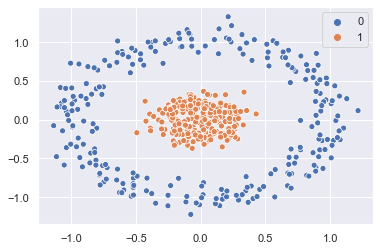

In [2]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(n_pts,1))
sns.scatterplot(X[:,0], X[:,1], hue=y)

In [3]:
class Model(nn.Module):
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)
    def forward(self, x):
        hidden = torch.sigmoid(self.linear(x))
        pred = torch.sigmoid(self.linear2(hidden))
        return pred
    def predict(self, x, threshold: float = 0.5):
        pred = self.forward(x)
        return 1 if pred >= threshold else 0

In [4]:
torch.manual_seed(2)
model = Model(2,4,1)
for name, param in model.named_parameters():
    print(name, param)

linear.weight Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True)
linear.bias Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True)
linear2.weight Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True)
linear2.bias Parameter containing:
tensor([0.2116], requires_grad=True)


### là encore je peux supprimer la dimension correspondant au nombre de mesures 

### Adam is a combination of Adagrad and RMSProp, very efficient to optimize our weights in our NN. It computes adaptive learning rate for each parameter

Text(0, 0.5, 'loss')

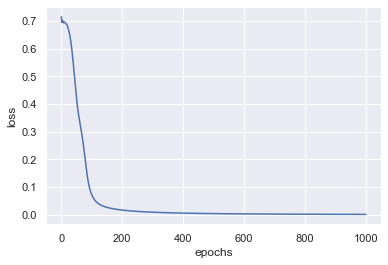

In [32]:
torch.manual_seed(2)
model = Model(2,4,1)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    # print("epoch:", i, "loss", loss.item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
plt.plot(range(epochs), losses)
plt.xlabel("epochs")
plt.ylabel("loss")

# Testing models

In [65]:
def plot_decision_boundary(X,y):
    x_span = np.linspace(min(X[:,0])-0.25, max(X[:,0])+0.25)
    y_span = np.linspace(min(X[:,1])-0.25, max(X[:,1])+0.25)
    xx, yy = np.meshgrid(x_span, y_span) #50x50 grid which covers our entire dataset
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()]) #ravel to make arrays 1D, np.c_ to concatenate coordinates
    pred_func = model.forward(grid) # we assign a probability to each element of the grid
    z = pred_func.view(xx.shape).detach() # we reshape so that the shape is the same as xx to put in contourf : detach removes attached grad
    plt.contourf(xx, yy, z) #Note : in contourf, i can put xx and yy or x_span and y_span

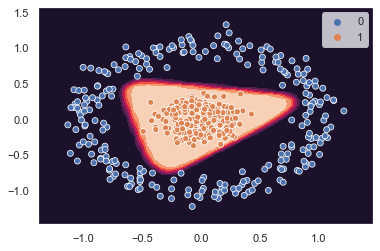

In [66]:
plot_decision_boundary(X,y)
sns.scatterplot(X[:,0], X[:,1], hue=y)

prediction is 1


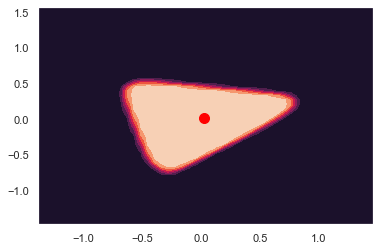

In [69]:
x = 0.025
y = 0.025
point = torch.Tensor([x,y])
prediction = model.predict(point)
plt.plot([x],[y], marker = 'o', markersize=10, color='red')
print("prediction is", prediction)
plot_decision_boundary(X,y)